In [6]:
import re

# LaTeX 파일 읽기
with open('a.tex', 'r', encoding='utf-8') as file:
    latex_content = file.read()
print(latex_content)


% !TEX program = xelatex
% This LaTeX document needs to be compiled with XeLaTeX.
\documentclass[10pt]{article}
%\usepackage[utf8]{inputenc} % XeLaTeX을 사용할 때는 필요하지 않음
\usepackage{amsmath}
\usepackage{amsfonts}
\usepackage{amssymb}
\usepackage[version=4]{mhchem}
\usepackage{stmaryrd}
\usepackage[fallback]{xeCJK}
\usepackage{polyglossia}
\usepackage{fontspec}

\setmainlanguage{english}
\setotherlanguage{korean}

\setmainfont{CMU Serif}
\setCJKmainfont{Noto Serif CJK KR}

\title{2019학년도 10월 고3 전국연합학력평가 문제지}

\author{}
\date{}

\begin{document}
\maketitle
5 지선 다형

\begin{enumerate}
  \item 두 벡터 $\vec{a}=(1,2), \vec{b}=(-2,5)$ 에 대하여 벡터 $2 \vec{a}-\vec{b}$ 의 모든 성분의 합은? [2점]\\
(1) 1\\
(2) 2\\
(3) 3\\
(4) 4\\
(5) 5

  \item 좌표공간의 세 점 $\mathrm{A}(2,6,-3), \mathrm{B}(-5,7,4), \mathrm{C}(3,-1,5)$ 를 꼭짓점으로 하는 삼각형 $\mathrm{ABC}$ 의 무게중심이 $\mathrm{G}(0, a, b)$ 일 때, $a+b$ 의 값은? [2점]
\end{enumerate}

\[
\begin{array}{lllll}
\text{ (1) } 6 & \text{ (2) } 7 & \text{ (3) } 8 & \text{ (4) } 9 & \text{ (5) }

In [16]:
pip install latex2sympy2

     ---------------------------------------- 0.0/112.3 kB ? eta -:--:--
     --- ------------------------------------ 10.2/112.3 kB ? eta -:--:--
     --------------------- ----------------- 61.4/112.3 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 112.3/112.3 kB 936.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/89.8 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/89.8 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/89.8 kB ? eta -:--:--
   ------------- -------------------------- 30.7/89.8 kB 435.7 kB/s eta 0:00:01
   ------------------ --------------------- 41.0/89.8 kB 326.8 kB/s eta 0:00:01
   --------------------------- ------------ 61.4/89.8 kB 363.1 kB/s eta 0:00:01
   ------------------------------------ --- 81.9/89.8 kB 327.3 kB/s eta 0:00:01
   ------------------------------------ --- 81.9/89.8 kB 32

In [19]:
import re
import latex2sympy2

# LaTeX 파일 읽기 함수 정의
def read_latex_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        latex_content = file.read()
    return latex_content

# LaTeX 파일에서 수식 추출 함수 정의
def extract_equations_from_latex(latex_content):
    # 수식 패턴 정의
    math_pattern = r'\$.*?\$|\$\$.*?\$\$|\\\((.*?)\\\)|\\\[(.*?)\\\]'

    # 수식 추출
    equations = re.findall(math_pattern, latex_content)
    equations = [eq for tup in equations for eq in tup if eq]  # 튜플에서 수식 문자열 추출
    
    return equations

# 예시: 'example.tex' 파일에서 수식 추출 및 변환
file_path = 'a.tex'  # 파일 경로를 적절히 수정하세요
latex_content = read_latex_file(file_path)
equations = extract_equations_from_latex(latex_content)

# 추출된 수식을 SymPy로 변환하여 출력
print("추출된 수식들:")
for equation in equations:
    sympy_expr = latex2sympy2(equation)
    print(equation, "->", sympy_expr)


추출된 수식들:


In [31]:
from latex2sympy2 import latex2sympy, latex2latex

tex = r"$\frac{5}{12}$"
# Or you can use '\mathrm{d}' to replace 'd'
latex2sympy(tex)
# => "Derivative(x**2 + x, x)"
latex2latex(tex)
# => "2 x + 1"

'\\frac{5}{12}'

In [15]:
import fitz  # PyMuPDF 라이브러리 사용

def save_pdf_page_as_image(pdf_file, page_number, output_image):
    # PDF 파일 열기
    pdf_document = fitz.open(pdf_file)

    # 페이지 번호 0부터 시작하므로 입력된 페이지 번호 - 1을 사용하여 페이지 가져오기
    page = pdf_document.load_page(page_number - 1)

    # 이미지로 변환하여 저장
    pix = page.get_pixmap()
    pix.writePNG(output_image)

    # PDF 문서 닫기
    pdf_document.close()


# 예시: 'example.pdf' 파일의 1페이지에서 특정 영역을 이미지로 저장
pdf_file = '2019 고3 10월 가형.pdf'  # PDF 파일 경로를 적절히 수정하세요
page_number = 1  # 저장할 페이지 번호를 설정하세요
# region = (100, 100, 400, 400)  # 왼쪽 위와 오른쪽 아래 좌표 (x1, y1, x2, y2)
output_image = 'region_image.png'  # 저장할 이미지 파일 경로를 설정하세요

save_pdf_page_as_image(pdf_file, page_number, output_image)


AttributeError: 'Pixmap' object has no attribute 'writePNG'

In [13]:
import cv2

# 이미지 로드
image = cv2.imread("as.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 이미지 이진화
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 컨투어 찾기
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 가장 큰 컨투어 찾기
max_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(max_contour)

# ROI 추출
roi = image[y:y+h, x:x+w]

# ROI를 화면에 출력
cv2.imshow('ROI', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [23]:
import cv2

# 이미지 로드
image = cv2.imread('as2.jpg')
template = cv2.imread('q.png')

# 템플릿 매칭 수행
result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

# 매칭 결과에서 최대값 위치 찾기
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# 템플릿 크기 구하기
h, w = template.shape[:2]

# 템플릿 위치를 기준으로 ROI 추출
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
roi = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

# ROI 출력
cv2.imshow('ROI', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
import cv2
import pytesseract

# 이미지 파일 경로 설정
image_path = '1.png'

# 이미지 불러오기
image = cv2.imread(image_path)

# 흑백 이미지로 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 이진화 처리
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# OCR을 통해 전체 텍스트 추출
full_text = pytesseract.image_to_string(thresh, lang='kor')

# 문제와 보기 구분 기준 문자열
split_keyword = '점]'

# 문제와 보기 구분
try:
    question_text, choices_text = full_text.split(split_keyword, 1)
    question_text += split_keyword  # 기준 문자열 다시 추가 (점] 포함)
except ValueError:
    print(f'문제와 보기를 구분할 수 없습니다. OCR 결과: {full_text}')
    exit(1)

# 문제 이미지로 저장
question_image = thresh.copy()
cv2.putText(question_image, question_text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
cv2.imwrite('question.png', question_image)
print('문제 이미지 저장 완료.')

# 보기 이미지로 저장
choices_image = thresh.copy()
cv2.putText(choices_image, choices_text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
cv2.imwrite('choices.png', choices_image)
print('보기 이미지 저장 완료.')


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [9]:
pip install easyocr --user

  Using cached easyocr-1.7.1-py3-none-any.whl.metadata (11 kB)
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached scikit_image-0.24.0-cp312-cp312-win_amd64.whl.metadata (14 kB)
  Using cached imageio-2.34.1-py3-none-any.whl.metadata (4.9 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached easyocr-1.7.1-py3-none-any.whl (2.9 MB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Using cached scikit_image-0.24.0-cp312-cp312-win_amd64.whl (12.9 MB)
Using cached imageio-2.34.1-py3-none-any.whl (313 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import easyocr

# 이미지 파일 경로
image_path = '1.png'

# EasyOCR 초기화
reader = easyocr.Reader(['en', 'ko'])  # 사용할 언어 코드 리스트

# 이미지에서 텍스트 인식
result = reader.readtext(image_path)

# 인식된 텍스트 출력
for detection in result:
    text, _, _ = detection
    print(text)


c:\Users\BIG3-06\.conda\envs\newa\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete[[2, 14], [256, 14], [256, 38], [2, 38]]
[[56, 58], [126, 58], [126, 82], [56, 82]]
[[129, 55], [145, 55], [145, 87], [129, 87]]
[[171, 51], [283, 51], [283, 89], [171, 89]]
[[16, 100], [414, 100], [414, 124], [16, 124]]
[[41, 137], [61, 137], [61, 171], [41, 171]]
[[121, 137], [241, 137], [241, 176], [121, 176]]


In [2]:
import cv2
import easyocr

# 이미지 경로 설정
image_path = '1.png'

# 이미지 불러오기
image = cv2.imread(image_path)
original_image = image.copy()

# EasyOCR Reader 생성
reader = easyocr.Reader(['ko'], gpu=False)

# 이미지에서 텍스트 인식
result = reader.readtext(image)

# 점] 텍스트 위치 찾기
split_keyword = '점]'
split_index = None
for idx, (bbox, text, prob) in enumerate(result):
    if split_keyword in text:
        split_index = idx
        break

if split_index is not None:
    # 점] 텍스트 위치 기준으로 위아래로 나누기
    split_bbox = result[split_index][0]
    
    # 점] 텍스트 위치의 y 좌표 찾기 (bbox의 평균 y 좌표 사용)
    split_y = int((split_bbox[0][1] + split_bbox[2][1]) / 2)
    
    # 위쪽 이미지 추출
    upper_image = original_image[:split_y, :]
    cv2.imwrite('upper_image.png', upper_image)
    print('위쪽 이미지 저장 완료.')
    
    # 아래쪽 이미지 추출
    lower_image = original_image[split_y:, :]
    cv2.imwrite('lower_image.png', lower_image)
    print('아래쪽 이미지 저장 완료.')
else:
    print(f'"{split_keyword}" 텍스트를 찾을 수 없습니다.')


Using CPU. Note: This module is much faster with a GPU.


위쪽 이미지 저장 완료.
아래쪽 이미지 저장 완료.


In [3]:
import cv2
import easyocr

# 이미지 경로 설정
image_path = 'as.jpg'

# 이미지 불러오기
image = cv2.imread(image_path)
original_image = image.copy()

# EasyOCR Reader 생성
reader = easyocr.Reader(['ko'], gpu=False)

# 이미지에서 텍스트 인식
result = reader.readtext(image)

# 점] 텍스트 위치 찾기
split_keyword = '점]'
split_indices = []
for idx, (bbox, text, prob) in enumerate(result):
    if split_keyword in text:
        split_indices.append(idx)

if split_indices:
    # 점] 텍스트 위치 기준으로 반복적으로 나누기
    prev_y = 0
    for idx, split_index in enumerate(split_indices):
        split_bbox = result[split_index][0]
        
        # 점] 텍스트 위치의 y 좌표 찾기 (bbox의 평균 y 좌표 사용)
        split_y = int((split_bbox[0][1] + split_bbox[2][1]) / 2)
        
        # 위쪽 이미지 추출
        part_image = original_image[prev_y:split_y, :]
        cv2.imwrite(f'part_image_{idx+1}.png', part_image)
        print(f'부분 이미지 {idx+1} 저장 완료.')
        
        prev_y = split_y
    
    # 마지막 부분 이미지 추출
    part_image = original_image[prev_y:, :]
    cv2.imwrite(f'part_image_{len(split_indices)+1}.png', part_image)
    print(f'부분 이미지 {len(split_indices)+1} 저장 완료.')
else:
    print(f'"{split_keyword}" 텍스트를 찾을 수 없습니다.')


Using CPU. Note: This module is much faster with a GPU.


부분 이미지 1 저장 완료.
부분 이미지 2 저장 완료.
부분 이미지 3 저장 완료.
부분 이미지 4 저장 완료.
부분 이미지 5 저장 완료.


In [5]:
import cv2
import easyocr

# 이미지 경로 설정
image_path = 'as.jpg'

# 이미지 불러오기
image = cv2.imread(image_path)
original_image = image.copy()

# EasyOCR Reader 생성
reader = easyocr.Reader(['ko'], gpu=False)

# 이미지에서 텍스트 인식
result = reader.readtext(image)

# 이미지의 세로 중앙 좌표 계산
height, width, _ = image.shape
mid_x = width // 2

# 왼쪽 부분과 오른쪽 부분으로 나누기
left_image = original_image[:, :mid_x]
right_image = original_image[:, mid_x:]

# 점] 텍스트 위치 찾기 함수 정의
def find_split_indices(image_part, result, x_offset=0):
    split_keyword = '점]'
    split_indices = []
    for idx, (bbox, text, prob) in enumerate(result):
        if split_keyword in text:
            # 점] 텍스트의 x 좌표가 해당 부분에 있는지 확인
            if bbox[0][0] >= x_offset and bbox[2][0] <= x_offset + image_part.shape[1]:
                split_indices.append(idx)
    return split_indices

# 왼쪽 부분에서 점] 텍스트 위치 찾기
left_split_indices = find_split_indices(left_image, result, x_offset=0)

# 오른쪽 부분에서 점] 텍스트 위치 찾기
right_split_indices = find_split_indices(right_image, result, x_offset=mid_x)

# 점] 텍스트 위치 기준으로 반복적으로 나누기 함수 정의
def save_split_images(image_part, split_indices, part_name):
    prev_y = 0
    for idx, split_index in enumerate(split_indices):
        split_bbox = result[split_index][0]
        
        # 점] 텍스트 위치의 y 좌표 찾기 (bbox의 평균 y 좌표 사용)
        split_y = int((split_bbox[0][1] + split_bbox[2][1]) / 2)
        
        # 위쪽 이미지 추출
        part_image = image_part[prev_y:split_y, :]
        cv2.imwrite(f'{part_name}_part_image_{idx+1}.png', part_image)
        print(f'{part_name} 부분 이미지 {idx+1} 저장 완료.')
        
        prev_y = split_y
    
    # 마지막 부분 이미지 추출
    part_image = image_part[prev_y:, :]
    cv2.imwrite(f'{part_name}_part_image_{len(split_indices)+1}.png', part_image)
    print(f'{part_name} 부분 이미지 {len(split_indices)+1} 저장 완료.')

# 왼쪽 부분 저장
if left_split_indices:
    save_split_images(left_image, left_split_indices, 'left')
else:
    print('왼쪽 부분에서 "점]" 텍스트를 찾을 수 없습니다.')

# 오른쪽 부분 저장
if right_split_indices:
    save_split_images(right_image, right_split_indices, 'right')
else:
    print('오른쪽 부분에서 "점]" 텍스트를 찾을 수 없습니다.')


Using CPU. Note: This module is much faster with a GPU.


left 부분 이미지 1 저장 완료.
left 부분 이미지 2 저장 완료.
left 부분 이미지 3 저장 완료.
right 부분 이미지 1 저장 완료.
right 부분 이미지 2 저장 완료.
right 부분 이미지 3 저장 완료.


In [10]:
import cv2
import easyocr
import re

# 이미지 경로 설정
image_path = 'as.jpg'

# 이미지 불러오기
image = cv2.imread(image_path)
original_image = image.copy()

# EasyOCR Reader 생성
reader = easyocr.Reader(['ko'], gpu=False)

# 이미지에서 텍스트 인식
result = reader.readtext(image)

# 이미지의 세로 중앙 좌표 계산
height, width, _ = image.shape
mid_x = width // 2

# 왼쪽 부분과 오른쪽 부분으로 나누기
left_image = original_image[:, :mid_x]
right_image = original_image[:, mid_x:]

# 점] 및 숫자 텍스트 위치 찾기 함수 정의
def find_split_indices(image_part, result, x_offset=0):
    number_pattern = re.compile(r'\d\.')
    split_keyword = '점]'
    split_indices = {'number': [], 'dot': []}

    for idx, (bbox, text, prob) in enumerate(result):
        if number_pattern.search(text):
            # 숫자 패턴의 x 좌표가 해당 부분에 있는지 확인
            if bbox[0][0] >= x_offset and bbox[2][0] <= x_offset + image_part.shape[1]:
                split_indices['number'].append((idx, bbox))
        elif split_keyword in text:
            # 점] 패턴의 x 좌표가 해당 부분에 있는지 확인
            if bbox[0][0] >= x_offset and bbox[2][0] <= x_offset + image_part.shape[1]:
                split_indices['dot'].append((idx, bbox))
    return split_indices

# 왼쪽 부분에서 텍스트 위치 찾기
left_split_indices = find_split_indices(left_image, result, x_offset=0)

# 오른쪽 부분에서 텍스트 위치 찾기
right_split_indices = find_split_indices(right_image, result, x_offset=mid_x)

# 텍스트 위치 기준으로 반복적으로 이미지 저장 함수 정의
def save_images_based_on_splits(image_part, split_indices, part_name):
    number_indices = split_indices['number']
    dot_indices = split_indices['dot']

    for i in range(len(number_indices)):
        if i < len(dot_indices):
            number_idx, number_bbox = number_indices[i]
            dot_idx, dot_bbox = dot_indices[i]
            
            # 숫자 위치의 y 좌표
            number_y = int((number_bbox[0][1] + number_bbox[2][1]) / 2) - 10  # 약간 위로 여백 추가
            # 점] 위치의 y 좌표
            dot_y = int((dot_bbox[0][1] + dot_bbox[2][1]) / 2) + 10  # 약간 아래로 여백 추가
            
            # 문제 이미지 추출
            question_image = image_part[number_y:dot_y, :]
            cv2.imwrite(f'{part_name}_question_{i+1}.png', question_image)
            print(f'{part_name} 문제 이미지 {i+1} 저장 완료.')
            
            # 보기가 있는 경우
            if i + 1 < len(number_indices):
                next_number_idx, next_number_bbox = number_indices[i + 1]
                next_number_y = int((next_number_bbox[0][1] + next_number_bbox[2][1]) / 2) - 10
                
                # 보기 이미지 추출
                choices_image = image_part[dot_y:next_number_y, :]
                cv2.imwrite(f'{part_name}_choices_{i+1}.png', choices_image)
                print(f'{part_name} 보기 이미지 {i+1} 저장 완료.')
            else:
                # 마지막 부분의 보기 이미지 추출
                choices_image = image_part[dot_y:, :]
                cv2.imwrite(f'{part_name}_choices_{i+1}.png', choices_image)
                print(f'{part_name} 보기 이미지 {i+1} 저장 완료.')

# 왼쪽 부분 저장
if left_split_indices['number'] and left_split_indices['dot']:
    save_images_based_on_splits(left_image, left_split_indices, 'left')
else:
    print('왼쪽 부분에서 "1." 또는 "점]" 텍스트를 찾을 수 없습니다.')

# 오른쪽 부분 저장
if right_split_indices['number'] and right_split_indices['dot']:
    save_images_based_on_splits(right_image, right_split_indices, 'right')
else:
    print('오른쪽 부분에서 "1." 또는 "점]" 텍스트를 찾을 수 없습니다.')


Using CPU. Note: This module is much faster with a GPU.


left 문제 이미지 1 저장 완료.
left 보기 이미지 1 저장 완료.
left 문제 이미지 2 저장 완료.
left 보기 이미지 2 저장 완료.
right 문제 이미지 1 저장 완료.
right 보기 이미지 1 저장 완료.
right 문제 이미지 2 저장 완료.
right 보기 이미지 2 저장 완료.


# 문제+보기 따로 저장

In [11]:
import cv2
import easyocr
import re

# 이미지 경로 설정
image_path = 'as.jpg'

# 이미지 불러오기
image = cv2.imread(image_path)
original_image = image.copy()

# EasyOCR Reader 생성
reader = easyocr.Reader(['ko'], gpu=False)

# 이미지에서 텍스트 인식
result = reader.readtext(image)

# 이미지의 세로 중앙 좌표 계산
height, width, _ = image.shape
mid_x = width // 2

# 왼쪽 부분과 오른쪽 부분으로 나누기
left_image = original_image[:, :mid_x]
right_image = original_image[:, mid_x:]

# 점] 및 숫자 텍스트 위치 찾기 함수 정의
def find_split_indices(image_part, result, x_offset=0):
    number_pattern = re.compile(r'\d\.')
    split_keyword = '점]'
    split_indices = {'number': [], 'dot': []}

    for idx, (bbox, text, prob) in enumerate(result):
        if number_pattern.search(text):
            # 숫자 패턴의 x 좌표가 해당 부분에 있는지 확인
            if bbox[0][0] >= x_offset and bbox[2][0] <= x_offset + image_part.shape[1]:
                split_indices['number'].append((idx, bbox))
        elif split_keyword in text:
            # 점] 패턴의 x 좌표가 해당 부분에 있는지 확인
            if bbox[0][0] >= x_offset and bbox[2][0] <= x_offset + image_part.shape[1]:
                split_indices['dot'].append((idx, bbox))
    return split_indices

# 왼쪽 부분에서 텍스트 위치 찾기
left_split_indices = find_split_indices(left_image, result, x_offset=0)

# 오른쪽 부분에서 텍스트 위치 찾기
right_split_indices = find_split_indices(right_image, result, x_offset=mid_x)

# 텍스트 위치 기준으로 반복적으로 이미지 저장 함수 정의
def save_images_based_on_splits(image_part, split_indices, part_name):
    number_indices = split_indices['number']
    dot_indices = split_indices['dot']

    for i in range(len(number_indices)):
        if i < len(dot_indices):
            number_idx, number_bbox = number_indices[i]
            dot_idx, dot_bbox = dot_indices[i]
            
            # 숫자 위치의 y 좌표
            number_y = int((number_bbox[0][1] + number_bbox[2][1]) / 2) - 20  # 약간 위로 여백 추가
            # 점] 위치의 y 좌표
            dot_y = int((dot_bbox[0][1] + dot_bbox[2][1]) / 2) + 20  # 약간 아래로 여백 추가
            
            # 문제 이미지 추출
            question_image = image_part[number_y:dot_y, :]
            cv2.imwrite(f'{part_name}_question2_{i+1}.png', question_image)
            print(f'{part_name} 문제 이미지 {i+1} 저장 완료.')
            
            # 보기가 있는 경우
            if i + 1 < len(number_indices):
                next_number_idx, next_number_bbox = number_indices[i + 1]
                next_number_y = int((next_number_bbox[0][1] + next_number_bbox[2][1]) / 2) - 10
                
                # 보기 이미지 추출
                choices_image = image_part[dot_y:next_number_y, :]
                cv2.imwrite(f'{part_name}_choices2_{i+1}.png', choices_image)
                print(f'{part_name} 보기 이미지 {i+1} 저장 완료.')
            else:
                # 마지막 부분의 보기 이미지 추출
                choices_image = image_part[dot_y:, :]
                cv2.imwrite(f'{part_name}_choices2_{i+1}.png', choices_image)
                print(f'{part_name} 보기 이미지 {i+1} 저장 완료.')

# 왼쪽 부분 저장
if left_split_indices['number'] and left_split_indices['dot']:
    save_images_based_on_splits(left_image, left_split_indices, 'left')
else:
    print('왼쪽 부분에서 "1." 또는 "점]" 텍스트를 찾을 수 없습니다.')

# 오른쪽 부분 저장
if right_split_indices['number'] and right_split_indices['dot']:
    save_images_based_on_splits(right_image, right_split_indices, 'right')
else:
    print('오른쪽 부분에서 "1." 또는 "점]" 텍스트를 찾을 수 없습니다.')


Using CPU. Note: This module is much faster with a GPU.


left 문제 이미지 1 저장 완료.
left 보기 이미지 1 저장 완료.
left 문제 이미지 2 저장 완료.
left 보기 이미지 2 저장 완료.
right 문제 이미지 1 저장 완료.
right 보기 이미지 1 저장 완료.
right 문제 이미지 2 저장 완료.
right 보기 이미지 2 저장 완료.


# 문제&보기 같이 저장

In [34]:
import cv2
import easyocr
import re

# 이미지 경로 설정
image_path = 'as.jpg'

# 이미지 불러오기
image = cv2.imread(image_path)
original_image = image.copy()

# EasyOCR Reader 생성
reader = easyocr.Reader(['ko'], gpu=False)

# 이미지에서 텍스트 인식
result = reader.readtext(image)

# 이미지의 세로 중앙 좌표 계산
height, width, _ = image.shape
mid_x = width // 2

# 왼쪽 부분과 오른쪽 부분으로 나누기
left_image = original_image[:, :mid_x]
right_image = original_image[:, mid_x:]

# 숫자 및 점] 텍스트 위치 찾기 함수 정의
def find_split_indices(image_part, result, x_offset=0):
    number_pattern = re.compile(r'\d\.')
    split_keyword = '점]'
    split_indices = {'number': [], 'dot': []}

    for idx, (bbox, text, prob) in enumerate(result):
        if number_pattern.search(text):
            # 숫자 패턴의 x 좌표가 해당 부분에 있는지 확인
            if bbox[0][0] >= x_offset and bbox[2][0] <= x_offset + image_part.shape[1]:
                split_indices['number'].append((idx, bbox))
        elif split_keyword in text:
            # 점] 패턴의 x 좌표가 해당 부분에 있는지 확인
            if bbox[0][0] >= x_offset and bbox[2][0] <= x_offset + image_part.shape[1]:
                split_indices['dot'].append((idx, bbox))
    return split_indices

# 문제 이미지와 보기 이미지를 합쳐서 저장 함수 정의
def save_combined_image(image_part, number_indices, dot_indices, part_name):
    for i, (number_idx, _) in enumerate(number_indices):
        if i < len(dot_indices):
            dot_idx, dot_bbox = dot_indices[i]
            
            # 숫자 위치의 y 좌표
            number_y = int((result[number_idx][0][0][1] + result[number_idx][0][2][1]) / 2) - 20  # 약간 위로 여백 추가
            # 점] 위치의 y 좌표
            dot_y = int((dot_bbox[0][1] + dot_bbox[2][1]) / 2)  # 점]의 중심 y 좌표
            
            # 문제 이미지 추출 (숫자 다음부터 점] 전까지)
            question_image = image_part[number_y:dot_y, :]
            
            # 점] 이후의 y 좌표 (보기 이미지의 시작점)
            if i + 1 < len(number_indices):
                next_number_idx, _ = number_indices[i + 1]
                next_number_y = int((result[next_number_idx][0][0][1] + result[next_number_idx][0][2][1]) / 2)  # 다음 숫자의 중심 y 좌표
                choices_start_y = dot_y+2  # 보기 이미지 시작점 (점] 이후 + 10 픽셀 여백)
                
                # 보기 이미지 추출 (점] 다음부터 다음 숫자 전까지)
                choices_image = image_part[dot_y:next_number_y, :]
            else:
                choices_start_y = dot_y +2  # 보기 이미지 시작점 (점] 이후 + 10 픽셀 여백)
                
                # 마지막 부분의 보기 이미지 추출 (점] 다음부터 끝까지)
                choices_image = image_part[dot_y:500, :]
            
            # 문제 이미지와 보기 이미지 합치기
            combined_image = cv2.vconcat([question_image, choices_image])
            
            # 이미지 저장
            cv2.imwrite(f'{part_name}_combined_{i+1}.png', combined_image)
            print(f'{part_name} 문제 및 보기 이미지 {i+1} 저장 완료.')

# 왼쪽 부분에서 텍스트 위치 찾기
left_split_indices = find_split_indices(left_image, result, x_offset=0)

# 오른쪽 부분에서 텍스트 위치 찾기
right_split_indices = find_split_indices(right_image, result, x_offset=mid_x)

# 왼쪽 부분 저장
if left_split_indices['number'] and left_split_indices['dot']:
    number_indices = left_split_indices['number']
    dot_indices = left_split_indices['dot']
    save_combined_image(left_image, number_indices, dot_indices, 'left')
else:
    print('왼쪽 부분에서 "1." 또는 "점]" 텍스트를 찾을 수 없습니다.')

# 오른쪽 부분 저장
if right_split_indices['number'] and right_split_indices['dot']:
    number_indices = right_split_indices['number']
    dot_indices = right_split_indices['dot']
    save_combined_image(right_image, number_indices, dot_indices, 'right')
else:
    print('오른쪽 부분에서 "1." 또는 "점]" 텍스트를 찾을 수 없습니다.')


Using CPU. Note: This module is much faster with a GPU.


left 문제 및 보기 이미지 1 저장 완료.
left 문제 및 보기 이미지 2 저장 완료.
right 문제 및 보기 이미지 1 저장 완료.
right 문제 및 보기 이미지 2 저장 완료.


In [61]:
import cv2
import easyocr
import re

# 이미지 경로 설정
image_path = 'as.jpg'

# 이미지 불러오기
image = cv2.imread(image_path)
original_image = image.copy()

# EasyOCR Reader 생성
reader = easyocr.Reader(['ko'], gpu=False)

# 이미지에서 텍스트 인식
result = reader.readtext(image)

# 이미지의 세로 중앙 좌표 계산
height, width, _ = image.shape
mid_x = width // 2

# 왼쪽 부분과 오른쪽 부분으로 나누기
left_image = original_image[:, :mid_x]
right_image = original_image[:, mid_x:]

# 숫자 및 점] 텍스트 위치 찾기 함수 정의
def find_split_indices(image_part, result, x_offset=0):
    number_pattern = re.compile(r'\d\.')
    split_keyword = '점]'
    split_indices = {'number': [], 'dot': []}

    for idx, (bbox, text, prob) in enumerate(result):
        if number_pattern.search(text):
            # 숫자 패턴의 x 좌표가 해당 부분에 있는지 확인
            if bbox[0][0] >= x_offset and bbox[2][0] <= x_offset + image_part.shape[1]:
                split_indices['number'].append((idx, bbox))
        elif split_keyword in text:
            # 점] 패턴의 x 좌표가 해당 부분에 있는지 확인
            if bbox[0][0] >= x_offset and bbox[2][0] <= x_offset + image_part.shape[1]:
                split_indices['dot'].append((idx, bbox))
    return split_indices

# 문제 이미지만을 추출하여 저장하는 함수 정의
def save_question_images(image_part, number_indices, part_name):
    for i, (number_idx, _) in enumerate(number_indices):
        if i + 1 < len(number_indices):
            next_number_idx, _ = number_indices[i + 1]
            # 현재 숫자 위치의 y 좌표
            current_y = int((result[number_idx][0][0][1] + result[number_idx][0][2][1]) / 2) - 30  # 약간 위로 여백 추가
            # 다음 숫자 위치의 y 좌표
            next_y = int((result[next_number_idx][0][0][1] + result[next_number_idx][0][2][1]) / 2) - 30  # 다음 숫자의 중심 y 좌표
            
            # 문제 이미지 추출 (현재 숫자 다음부터 다음 숫자 전까지)
            question_image = image_part[current_y:next_y, :]
            
            # 이미지 저장
            cv2.imwrite(f'{part_name}_1question_{i+1}.png', question_image)
            print(f'{part_name} 문제 이미지 {i+1} 저장 완료.')

            # 다음 숫자 이미지 추출
            if next_y < image_part.shape[0]:  # 다음 숫자의 중심 y 좌표가 이미지의 높이를 넘지 않을 경우
                next_question_image = image_part[next_y:image_part.shape[0], :]
            else:
                print(f'{part_name} 다음 숫자 이미지가 이미지의 끝을 넘어갑니다. 처리를 중단합니다.')
                break
            
            # 다음 숫자 이미지 저장
            cv2.imwrite(f'{part_name}_2question_{i+1}.png', next_question_image)
            print(f'{part_name} 다음 숫자 이미지 {i+1} 저장 완료.')

# 왼쪽 부분에서 텍스트 위치 찾기
left_split_indices = find_split_indices(left_image, result, x_offset=0)

# 오른쪽 부분에서 텍스트 위치 찾기
right_split_indices = find_split_indices(right_image, result, x_offset=mid_x)

# 왼쪽 부분 저장
if left_split_indices['number']:
    number_indices = left_split_indices['number']
    save_question_images(left_image, number_indices, 'left')
else:
    print('왼쪽 부분에서 "1." 텍스트를 찾을 수 없습니다.')

# 오른쪽 부분 저장
if right_split_indices['number']:
    number_indices = right_split_indices['number']
    save_question_images(right_image, number_indices, 'right')
else:
    print('오른쪽 부분에서 "1." 텍스트를 찾을 수 없습니다.')

Using CPU. Note: This module is much faster with a GPU.


left 문제 이미지 1 저장 완료.
left 다음 숫자 이미지 1 저장 완료.
right 문제 이미지 1 저장 완료.
right 다음 숫자 이미지 1 저장 완료.


---

In [18]:
import cv2
import easyocr
import re

# 이미지 경로 설정
image_path = '20190310_A_002.jpg'

# 이미지 불러오기
image = cv2.imread(image_path)
original_image = image.copy()

# EasyOCR Reader 생성
reader = easyocr.Reader(['ko'], gpu=False)

# 이미지에서 텍스트 인식
result = reader.readtext(image)

# 이미지의 세로 중앙 좌표 계산
height, width, _ = image.shape
mid_x = width // 2

# 왼쪽 부분과 오른쪽 부분으로 나누기
left_image = original_image[:, :mid_x]
right_image = original_image[:, mid_x:]

# 숫자 및 점] 텍스트 위치 찾기 함수 정의
def find_split_indices(image_part, result, x_offset=0):
    number_pattern = re.compile(r'\d\.')
    split_keyword = '점]'
    split_indices = {'number': [], 'dot': []}

    for idx, (bbox, text, prob) in enumerate(result):
        if number_pattern.search(text):
            # 숫자 패턴의 x 좌표가 해당 부분에 있는지 확인
            if bbox[0][0] >= x_offset and bbox[2][0] <= x_offset + image_part.shape[1]:
                split_indices['number'].append((idx, bbox))
        elif split_keyword in text:
            # 점] 패턴의 x 좌표가 해당 부분에 있는지 확인
            if bbox[0][0] >= x_offset and bbox[2][0] <= x_offset + image_part.shape[1]:
                split_indices['dot'].append((idx, bbox))
    return split_indices

# 문제 이미지만을 추출하여 저장하는 함수 정의
def save_question_images(image_part, number_indices, part_name):
    for i, (number_idx, _) in enumerate(number_indices):
        if i + 1 < len(number_indices):
            next_number_idx, _ = number_indices[i + 1]
            # 현재 숫자 위치의 y 좌표 - 문제 위에 여백 추가
            current_y = int((result[number_idx][0][0][1] + result[number_idx][0][2][1]) / 2) - 20  # 약간 위로 여백 추가
            # 다음 숫자 위치의 y 좌표
            next_y = int((result[next_number_idx][0][0][1] + result[next_number_idx][0][2][1]) / 2) - 30  # 다음 숫자의 중심 y 좌표
            
            # 문제 이미지 추출 (현재 숫자 다음부터 다음 숫자 전까지)
            question_image = image_part[current_y:next_y, :]
            
            # 이미지 저장
            cv2.imwrite(f'{part_name}_1question_{i+1}.png', question_image)
            print(f'{part_name} 문제 이미지 {i+1} 저장 완료.')

            # 다음 숫자 이미지 추출
            if next_y < image_part.shape[0]:  # 다음 숫자의 중심 y 좌표가 이미지의 높이를 넘지 않을 경우
                next_question_image = image_part[next_y:image_part.shape[0], :]
            else:
                print(f'{part_name} 다음 숫자 이미지가 이미지의 끝을 넘어갑니다. 처리를 중단합니다.')
                break
            
            # 이미지의 아래 부분 자르기 (예: 아래에서 20 픽셀 만큼)
            bottom_cut = 175
            next_question_image = next_question_image[:-bottom_cut, :]
            
            # 다음 숫자 이미지 저장
            cv2.imwrite(f'{part_name}_2question_{i+1}.png', next_question_image)
            print(f'{part_name} 다음 숫자 이미지 {i+1} 저장 완료.')

# 왼쪽 부분에서 텍스트 위치 찾기
left_split_indices = find_split_indices(left_image, result, x_offset=0)

# 오른쪽 부분에서 텍스트 위치 찾기
right_split_indices = find_split_indices(right_image, result, x_offset=mid_x)

# 왼쪽 부분 저장
if left_split_indices['number']:
    number_indices = left_split_indices['number']
    save_question_images(left_image, number_indices, 'left')
else:
    print('왼쪽 부분에서 "1." 텍스트를 찾을 수 없습니다.')

# 오른쪽 부분 저장
if right_split_indices['number']:
    number_indices = right_split_indices['number']
    save_question_images(right_image, number_indices, 'right')
else:
    print('오른쪽 부분에서 "1." 텍스트를 찾을 수 없습니다.')


Using CPU. Note: This module is much faster with a GPU.


왼쪽 부분에서 "1." 텍스트를 찾을 수 없습니다.


# 전체 이미지 반복문 돌리는 코드

In [3]:
import os
import cv2

# 이미지가 있는 디렉토리 경로 설정
directory = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\ilovepdf_pages-to-jpg'

# 디렉토리 내 모든 파일 가져오기
files = os.listdir(directory)

# 이미지 파일만 필터링
image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# 모든 이미지를 저장할 리스트 생성
images = []

# 각 이미지 파일을 순회하며 읽어서 리스트에 추가
for image_file in image_files:
    image_path = os.path.join(directory, image_file)
    image = cv2.imread(image_path)
    if image is not None:
        images.append(image)
    else:
        print(f'이미지를 읽을 수 없습니다: {image_path}')

# 이미지 리스트 확인
print(f'불러온 이미지 개수: {len(images)}')




불러온 이미지 개수: 12


In [58]:
import cv2
import easyocr
import re
import os

# EasyOCR Reader 생성
reader = easyocr.Reader(['ko'], gpu=False)  # GPU 사용 여부 확인 필요

# 이미지가 있는 폴더 경로 설정
image_folder = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\ilovepdf_pages-to-jpg'

# 새로운 폴더 경로 설정
output_folder = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\extracted_images'
os.makedirs(output_folder, exist_ok=True)  # 새로운 폴더 생성

# 이미지에서 텍스트 인식
def read_image_text(image):
    return reader.readtext(image)



# 한글부터 점]이 나오기 전까지의 영역을 이미지로 추출하여 저장하는 함수 정의
def save_korean_to_dot_images(image_part, result, part_name, page_num):
    start_pattern = re.compile(r'^\d')  # 숫자로 시작하는 패턴
    end_pattern = '점]'  # 점] 패턴
    start_index = None
    end_index = None

    for idx, (bbox, text, prob) in enumerate(result):
        if start_index is None and start_pattern.match(text):
            start_index = idx
        if start_index is not None and end_pattern in text:
            end_index = idx
            break

    if start_index is not None and end_index is not None:
        # 시작 텍스트 위치의 y 좌표
        start_y = int(result[start_index][0][0][1]) - 20  # 약간 위로 여백 추가
        # 종료 텍스트 위치의 y 좌표
        end_y = int(result[end_index][0][2][1]) + 50  # 약간 아래로 여백 추가

        # 문제 이미지 추출
        question_image = image_part[start_y:end_y, :]

        # 이미지 저장
        output_path = os.path.join(output_folder, f'{part_name}_page_{page_num}_question.png')
        cv2.imwrite(output_path, question_image)
        print(f'{part_name} 페이지 {page_num} 문제 이미지 저장 완료.')
    else:
        print(f'{part_name} 페이지 {page_num}에서 패턴을 찾을 수 없습니다.')

# 폴더 내 이미지 파일 목록 가져오기
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.jpg')])

# 각 이미지 파일에 대해 처리
for idx, image_file in enumerate(image_files):
    page_num = idx + 1
    image_path = os.path.join(image_folder, image_file)
    
    # 이미지 불러오기
    image = cv2.imread(image_path)
    original_image = image.copy()
    
    # 이미지의 가로 중앙 좌표 계산
    height, width, _ = image.shape
    mid_x = width // 2

    # 왼쪽 부분과 오른쪽 부분으로 나누기
    left_image = original_image[:, :mid_x]
    right_image = original_image[:, mid_x:]
    
    # 왼쪽 부분에서 텍스트 인식
    left_result = read_image_text(left_image)
    # 오른쪽 부분에서 텍스트 인식
    right_result = read_image_text(right_image)
    
    # 왼쪽 부분 저장
    save_korean_to_dot_images(left_image, left_result, 'left', page_num)
    
    # 오른쪽 부분 저장
    save_korean_to_dot_images(right_image, right_result, 'right', page_num)


Using CPU. Note: This module is much faster with a GPU.


left 페이지 1 문제 이미지 저장 완료.
right 페이지 1 문제 이미지 저장 완료.
left 페이지 2 문제 이미지 저장 완료.
right 페이지 2 문제 이미지 저장 완료.
left 페이지 3 문제 이미지 저장 완료.
right 페이지 3 문제 이미지 저장 완료.
left 페이지 4 문제 이미지 저장 완료.
right 페이지 4 문제 이미지 저장 완료.
left 페이지 5 문제 이미지 저장 완료.
right 페이지 5 문제 이미지 저장 완료.
left 페이지 6 문제 이미지 저장 완료.
right 페이지 6 문제 이미지 저장 완료.
left 페이지 7 문제 이미지 저장 완료.
right 페이지 7 문제 이미지 저장 완료.
left 페이지 8 문제 이미지 저장 완료.
right 페이지 8 문제 이미지 저장 완료.
left 페이지 9 문제 이미지 저장 완료.
right 페이지 9 문제 이미지 저장 완료.
left 페이지 10 문제 이미지 저장 완료.
right 페이지 10 문제 이미지 저장 완료.
left 페이지 11 문제 이미지 저장 완료.
right 페이지 11 문제 이미지 저장 완료.
left 페이지 12 문제 이미지 저장 완료.
right 페이지 12 문제 이미지 저장 완료.


---

In [15]:
import cv2
import easyocr
import re
import os

# EasyOCR Reader 생성
reader = easyocr.Reader(['ko'], gpu=False)  # GPU 사용 여부 확인 필요

# 이미지가 있는 폴더 경로 설정
image_folder = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\ilovepdf_pages-to-jpg'

# 새로운 폴더 경로 설정
output_folder = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\extracted_images'
os.makedirs(output_folder, exist_ok=True)  # 새로운 폴더 생성

# 이미지에서 텍스트 인식
def read_image_text(image):
    return reader.readtext(image)

# # 텍스트 인덱스 찾기 함수 정의
# def find_text_indices(result):
#     start_pattern_dot = re.compile(r'\d\.')  # 숫자. 패턴
#     start_pattern_num = re.compile(r'^\d')  # 숫자로 시작하는 패턴
#     end_pattern = ']'  # 점] 패턴
#     text_indices = []
#     start_index = None


#     # 첫 번째 시도: \d\. 패턴 찾기
#     for idx, (bbox, text, prob) in enumerate(result):
#         if start_index is None and start_pattern_dot.search(text):
#             start_index = idx
#         elif start_index is not None and end_pattern in text:
#             end_index = idx
#             text_indices.append((start_index, end_index))
#             start_index = None  # 초기화하여 다음 패턴을 찾기 시작

#     # 두 번째 시도: \d\. 패턴이 없으면 ^\d 패턴 찾기
#     if not text_indices:
#         start_index = None
#         for idx, (bbox, text, prob) in enumerate(result):
#             if start_index is None and start_pattern_num.match(text):
#                 start_index = idx
#             elif start_index is not None and end_pattern in text:
#                 end_index = idx
#                 text_indices.append((start_index, end_index))
#                 start_index = None  # 초기화하여 다음 패턴을 찾기 시작

#     return text_indices

# 텍스트 인덱스 찾기 함수 정의
def find_text_indices(result):
    start_pattern_dot = re.compile(r'\d\.')  # 숫자. 패턴
    start_pattern_num = re.compile(r'^\d\s+\w+')  # 숫자+문자로 시작하는 패턴
    start_pattern_mid = re.compile(r'\D\d+')  # 가운데 숫자 패턴
    # start_pattern = re.compile(r'^[가-힣a-zA-Z]')  # 한글 또는 영어로 시작하는 패턴
    end_pattern = ']'  # 점] 패턴
    text_indices = []
    start_index = None

    # 첫 번째 시도: 숫자. 패턴 찾기
    for idx, (bbox, text, prob) in enumerate(result):
        if start_index is None and start_pattern_dot.search(text):
            start_index = idx
        elif start_index is not None and end_pattern in text:
            end_index = idx
            text_indices.append((start_index, end_index))
            start_index = None  # 초기화하여 다음 패턴을 찾기 시작

    # # 두 번째 시도: 숫자로 시작하는 패턴 찾기
    if not text_indices:
        start_index = None
        for idx, (bbox, text, prob) in enumerate(result):
            if start_index is None and start_pattern_num.match(text):
                start_index = idx
            elif start_index is not None and end_pattern in text:
                end_index = idx
                text_indices.append((start_index, end_index))
                start_index = None  # 초기화하여 다음 패턴을 찾기 시작

    # 세 번째 시도: 가운데 숫자 패턴 찾기
    if not text_indices:
        start_index = None
        for idx, (bbox, text, prob) in enumerate(result):
            if start_index is None and start_pattern_mid.search(text):
                start_index = idx
            elif start_index is not None and end_pattern in text:
                end_index = idx
                text_indices.append((start_index, end_index))
                start_index = None  # 초기화하여 다음 패턴을 찾기 시작

    # if not text_indices:
    #     start_index = None
    #     for idx, (bbox, text, prob) in enumerate(result):
    #         if start_index is None and start_pattern.match(text):
    #             start_index = idx
    #         elif start_index is not None and end_pattern in text:
    #             end_index = idx
    #             text_indices.append((start_index, end_index))
    #             start_index = None  # 초기화하여 다음 패턴을 찾기 시작

    return text_indices


# # 점] 패턴이 기준으로 일정 픽셀 이상 떨어져 있는 숫자를 확인하는 함수
def is_far_enough(result, start_idx, min_distance=500):
    start_y = int(result[start_idx][0][0][1])
    for idx in range(start_idx + 1, len(result)):
        text_y = int(result[idx][0][0][1])
        if text_y - start_y >= min_distance:
            return True, idx
    return False, -1


# 한글부터 점]이 나오기 전까지의 영역을 이미지로 추출하여 저장하는 함수 정의
def save_korean_to_dot_images(image_part, result, text_indices, part_name, page_num):
    for i, (start_idx, end_idx) in enumerate(text_indices):
        # 시작 텍스트 위치의 y 좌표 - 문제 위에 여백 추가
        start_y = int(result[start_idx][0][0][1]) - 17  # 약간 위로 여백 추가

        far_enough, next_start_idx = is_far_enough(result, end_idx)
        if far_enough:
            next_start_y = int(result[next_start_idx][0][0][1]) - 100
            end_y = next_start_y  # 다음 텍스트 시작 전까지로 설정

        # if i + 1 < len(text_indices):
        #     # 다음 텍스트 위치의 y 좌표 - 문제 아래에 여백 추가
        #     next_start_idx, _ = text_indices[i + 1]
        #     next_start_y = int(result[next_start_idx][0][0][1]) - 25
        #     end_y = next_start_y  # 다음 텍스트 시작 전까지로 설정
        
        else:
            # 이미지의 끝까지 포함
            end_y = image_part.shape[0] - 300

        # 문제 이미지 추출
        question_image = image_part[start_y:end_y, :]

        # 이미지 저장
        output_path = os.path.join(output_folder, f'{page_num}_page_question_{part_name}_{i+1}.png')
        cv2.imwrite(output_path, question_image)
        print(f'{part_name} 페이지 {page_num} 문제 이미지 {i+1} 저장 완료.')

# 폴더 내 이미지 파일 목록 가져오기
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.jpg')])

# 각 이미지 파일에 대해 처리
for idx, image_file in enumerate(image_files):
    page_num = idx + 1
    image_path = os.path.join(image_folder, image_file)
    
    # 이미지 불러오기
    image = cv2.imread(image_path)
    original_image = image.copy()
    
    # 이미지의 가로 중앙 좌표 계산
    height, width, _ = image.shape
    mid_x = width // 2

    # # 왼쪽 부분과 오른쪽 부분으로 나누기
    left_image = original_image[:, :mid_x]
    right_image = original_image[:, mid_x:]
    
    # 왼쪽 부분에서 텍스트 인식
    left_result = read_image_text(left_image)
    # 오른쪽 부분에서 텍스트 인식
    right_result = read_image_text(right_image)
    
    # 왼쪽 부분에서 텍스트 인덱스 찾기
    left_text_indices = find_text_indices(left_result)
    # 오른쪽 부분에서 텍스트 인덱스 찾기
    right_text_indices = find_text_indices(right_result)
    
    # 왼쪽 부분 저장
    if left_text_indices:
        save_korean_to_dot_images(left_image, left_result, left_text_indices, 'left', page_num)
    else:
        print(f'{image_file} 왼쪽 부분에서 패턴을 찾을 수 없습니다.')
    
    # 오른쪽 부분 저장
    if right_text_indices:
        save_korean_to_dot_images(right_image, right_result, right_text_indices, 'right', page_num)
    else:
        print(f'{image_file} 오른쪽 부분에서 패턴을 찾을 수 없습니다.')


Using CPU. Note: This module is much faster with a GPU.


left 페이지 1 문제 이미지 1 저장 완료.
left 페이지 1 문제 이미지 2 저장 완료.
right 페이지 1 문제 이미지 1 저장 완료.
right 페이지 1 문제 이미지 2 저장 완료.
left 페이지 2 문제 이미지 1 저장 완료.
right 페이지 2 문제 이미지 1 저장 완료.
left 페이지 3 문제 이미지 1 저장 완료.
left 페이지 3 문제 이미지 2 저장 완료.
right 페이지 3 문제 이미지 1 저장 완료.
left 페이지 4 문제 이미지 1 저장 완료.
right 페이지 4 문제 이미지 1 저장 완료.
left 페이지 5 문제 이미지 1 저장 완료.
right 페이지 5 문제 이미지 1 저장 완료.
left 페이지 6 문제 이미지 1 저장 완료.
right 페이지 6 문제 이미지 1 저장 완료.
left 페이지 7 문제 이미지 1 저장 완료.
right 페이지 7 문제 이미지 1 저장 완료.
left 페이지 8 문제 이미지 1 저장 완료.
right 페이지 8 문제 이미지 1 저장 완료.
left 페이지 9 문제 이미지 1 저장 완료.
right 페이지 9 문제 이미지 1 저장 완료.
left 페이지 10 문제 이미지 1 저장 완료.
right 페이지 10 문제 이미지 1 저장 완료.
left 페이지 11 문제 이미지 1 저장 완료.
right 페이지 11 문제 이미지 1 저장 완료.
left 페이지 12 문제 이미지 1 저장 완료.
right 페이지 12 문제 이미지 1 저장 완료.


---

# bbox 생성 코드

In [261]:
import cv2
import easyocr
import os

# 이미지 파일 경로 설정
image_path = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\test\2015_G1_3_KOR\cropped\2015_G1_3_KOR_right_kor_page1.png'

# EasyOCR Reader 생성
reader = easyocr.Reader(['ko'], gpu=False)

# 이미지 불러오기
image = cv2.imread(image_path)
original_image = image.copy()

# 이미지에서 텍스트 인식
result = reader.readtext(image)

# 인식된 텍스트의 bbox를 이미지에 그리는 함수 정의
def draw_bbox(image, result):
    for (bbox, text, prob) in result:
        # bbox 좌표 추출
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))

        # bbox에 사각형 그리기
        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

        # 이미지에 텍스트 표시
        cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

    return image

# bbox를 그린 이미지 생성
image_with_bbox = draw_bbox(original_image, result)

# 결과 이미지 보여주기/

# 결과 이미지 저장 (선택 사항)
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)
output_path = os.path.join(output_folder, 'image_with_bbox_02.jpg')
cv2.imwrite(output_path, image_with_bbox)
print(f'Result image with bounding boxes saved at {output_path}')


Using CPU. Note: This module is much faster with a GPU.


Result image with bounding boxes saved at output\image_with_bbox_02.jpg


Shape: (3309, 2339, 3)
Data type: uint8


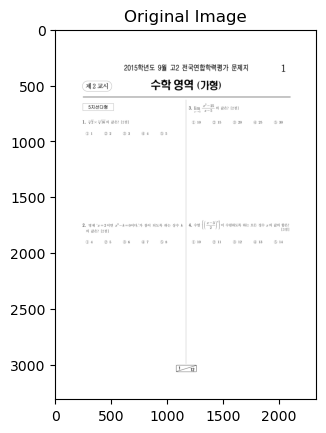

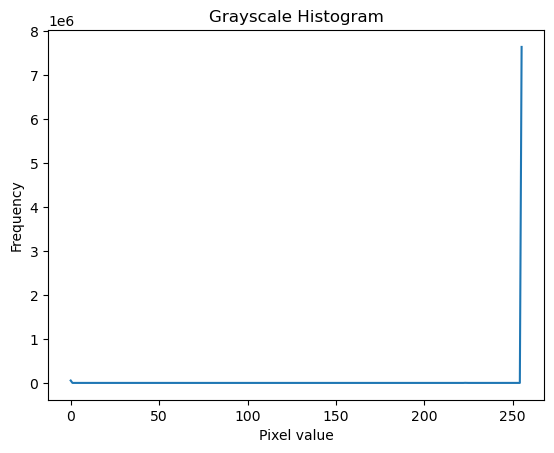

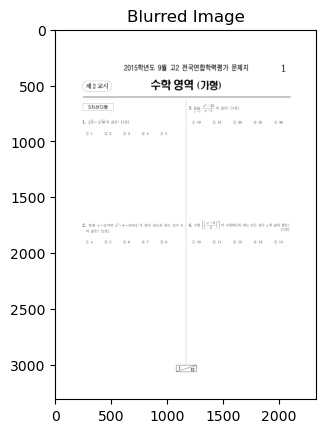

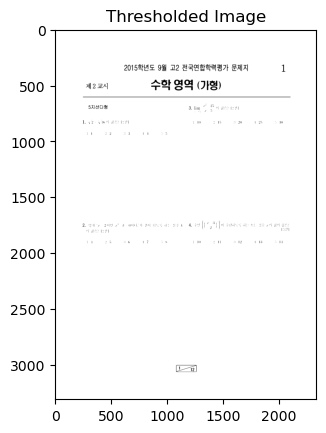

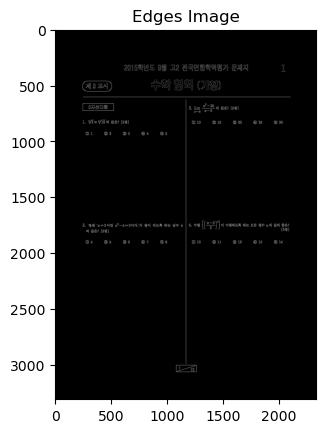

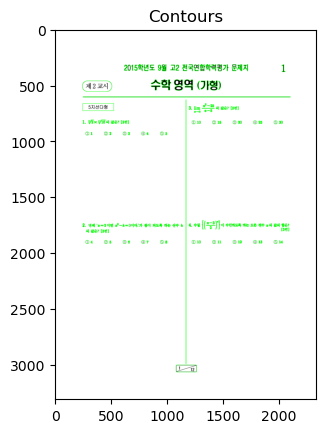

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\G2\2015_G2_9_MATH_A\MATH_page0.png'
def analyze_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Print basic information
    print(f"Shape: {image.shape}")
    print(f"Data type: {image.dtype}")

    # Display the original image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.show()

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate and plot histogram
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title('Grayscale Histogram')
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')
    plt.show()

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    plt.imshow(blurred, cmap='gray')
    plt.title('Blurred Image')
    plt.show()

    # Apply thresholding
    _, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image')
    plt.show()

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)
    plt.imshow(edges, cmap='gray')
    plt.title('Edges Image')
    plt.show()

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    contour_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
    plt.imshow(contour_image)
    plt.title('Contours')
    plt.show()

# Analyze a specific image
analyze_image(r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\G2\2015_G2_9_MATH_A\MATH_page0.png')


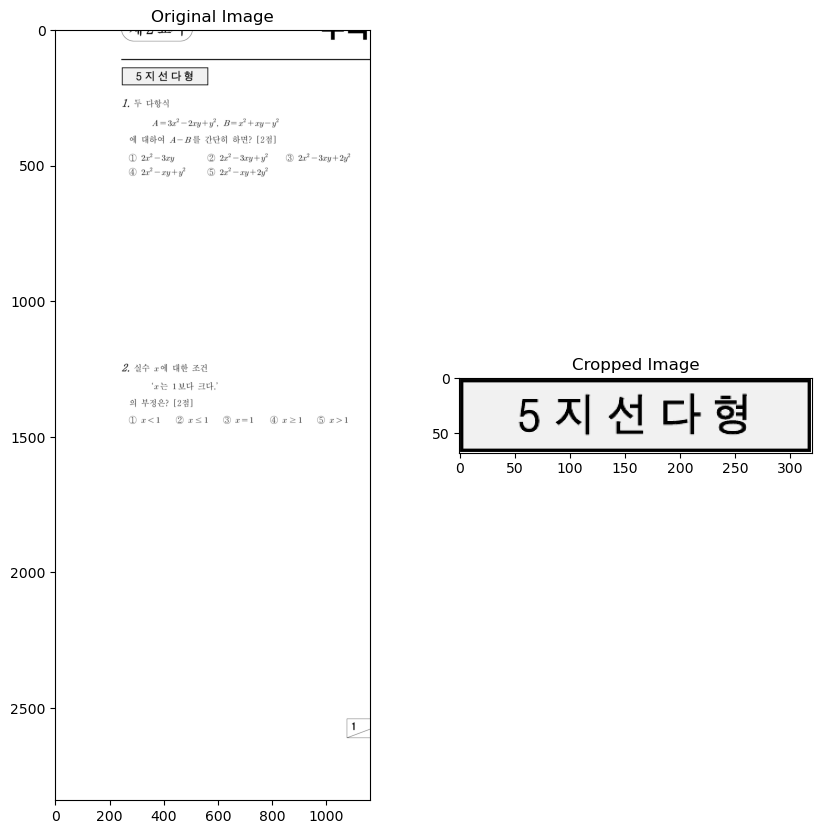

In [11]:
import cv2
import matplotlib.pyplot as plt

# 이미지 로드
image_path = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\G1G2_MATH\G2202203_MATH\cropped\left_math_page0.png'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 블러링 적용
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 캐니 엣지 검출 적용
edges = cv2.Canny(blurred, 50, 150)

# 컨투어 검출
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 가장 큰 컨투어 찾기
largest_contour = max(contours, key=cv2.contourArea)

# 컨투어 경계 박스 찾기
x, y, w, h = cv2.boundingRect(largest_contour)

# 이미지를 경계 박스로 자르기
cropped_image = image[y:y+h, x:x+w]

# 결과 시각화
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(122)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')

plt.show()


In [4]:
import cv2
import easyocr

# EasyOCR 인스턴스 생성
reader = easyocr.Reader(['ko', 'en'])  # 인식할 언어 설정

# 이미지 파일 경로
image_path = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\math_croped_G2\2024_G2_6_MATH\cropped\2024_G2_6_MATH_right_MATH_page8.png_cropped_1.png'

# 이미지 불러오기
image = cv2.imread(image_path)

# 이미지를 그레이스케일로 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 이미지 이진화 (임계값 이상의 명암을 가지는 픽셀을 흰색(255)으로 변환)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# EasyOCR을 사용하여 텍스트 인식
result = reader.readtext(thresh)

# 결과 출력
for detection in result:
    print(detection[1])  # 텍스트 추출

# 인식된 텍스트를 파일에 저장
output_file = 'output.txt'
with open(output_file, 'w', encoding='utf-8') as f:
    for detection in result:
        f.write(detection[1] + '\n')

print(f'인식된 텍스트를 {output_file}에 저장했습니다.')


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


단답형
22 (5?-V5)? + V5 의 값을 구하시오: [3점]
인식된 텍스트를 output.txt에 저장했습니다.


In [5]:
import pdfplumber

# PDF 파일 열기
with pdfplumber.open('2019 고3 10월 가형.pdf') as pdf:
    # 모든 페이지 순회
    for page in pdf.pages:
        # 페이지의 텍스트 추출
        text = page.extract_text()
        print(text)


2019학년도 10월 고3 전국연합학력평가 문제지 1
제2교시
수학 영역(가형)
5지선다형 3.좌표공간의 세 점 A , B, C 를
꼭짓점으로 하는 삼각형 ABC의 무게중심이 G일 때,
1.두 벡터   ,   에 대하여 벡터    의 모든 의 값은? [2점]
성분의 합은? [2점] ①  ②  ③  ④  ⑤ 
①  ②  ③  ④  ⑤ 
ln
2.lim  의 값은? [2점] 4.두 사건 와 가 서로 독립이고
→
 
①  ②  ③  ④  ⑤  P, P∩
일 때, P의 값은? (단, 은 의 여사건이다.) [3점]
    
① ② ③ ④ ⑤
    
1
12
2 수학 영역(가형)
고 3
  
5.직선 가 쌍곡선  의 한 점근선일 때, 이 7.좌표평면 위를 움직이는 점 P의 시각 에서의 위치 가
쌍곡선의 주축의 길이는? (단, 는 양수이다.) [3점] sin, cos
①  ②  ③  ④  ⑤  
이다. 시각  에서 점 P의 속력은? [3점]
①  ②  ③  ④  ⑤ 
6.에 대한 방정식
×
이 오직 하나의 실근 를 가질 때, 의 값은? (단, 는
상수이다.) [3점]
①  ②  ③  ④  ⑤ 
2
12
고3
수학 영역(가형) 3
8.이고 coscos 일 때, sin의 10.한 개의 주사위와 개의 동전을 동시에 던질 때, 주사위를
던져서 나온 눈의 수와 개의 동전 중 앞면이 나온 동전의
값은? [3점]
개수가 같을 확률은? [3점]
 
①  ②  ③ 
①


②
 

③


④
 

⑤


In [13]:
import pdfplumber
import re
import os
import cv2
import numpy as np

# PDF 파일 경로 설정
pdf_path = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\2019 고3 10월 가형.pdf'

# 새로운 폴더 경로 설정
output_folder = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\extracted_images_pdf'
os.makedirs(output_folder, exist_ok=True)  # 새로운 폴더 생성

# 텍스트 인덱스 찾기 함수 정의
def find_text_indices(text):
    start_pattern_dot = re.compile(r'\d\.')  # 숫자. 패턴
    start_pattern_num = re.compile(r'^\d\s+\w+')  # 숫자+문자로 시작하는 패턴
    start_pattern_mid = re.compile(r'\D\d+')  # 가운데 숫자 패턴
    end_pattern = ']'  # 점] 패턴
    text_indices = []
    start_index = None

    lines = text.split('\n')
    
    # 첫 번째 시도: 숫자. 패턴 찾기
    for idx, line in enumerate(lines):
        if start_index is None and start_pattern_dot.search(line):
            start_index = idx
        elif start_index is not None and end_pattern in line:
            end_index = idx
            text_indices.append((start_index, end_index))
            start_index = None  # 초기화하여 다음 패턴을 찾기 시작

    # 두 번째 시도: 숫자로 시작하는 패턴 찾기
    if not text_indices:
        start_index = None
        for idx, line in enumerate(lines):
            if start_index is None and start_pattern_num.match(line):
                start_index = idx
            elif start_index is not None and end_pattern in line:
                end_index = idx
                text_indices.append((start_index, end_index))
                start_index = None  # 초기화하여 다음 패턴을 찾기 시작

    # 세 번째 시도: 가운데 숫자 패턴 찾기
    if not text_indices:
        start_index = None
        for idx, line in enumerate(lines):
            if start_index is None and start_pattern_mid.search(line):
                start_index = idx
            elif start_index is not None and end_pattern in line:
                end_index = idx
                text_indices.append((start_index, end_index))
                start_index = None  # 초기화하여 다음 패턴을 찾기 시작

    return text_indices, lines

# PDF 페이지에서 텍스트를 추출하고 이미지를 저장하는 함수 정의
def save_korean_to_dot_images(page, lines, text_indices, part_name, page_num):
    for i, (start_idx, end_idx) in enumerate(text_indices):
        # 텍스트 라인의 좌표를 가져오기
        start_line = lines[start_idx]
        end_line = lines[end_idx]

        # 시작 텍스트 위치의 bbox - 문제 위에 여백 추가
        start_bbox = page.extract_words()[start_idx]['top'] - 20  # 약간 위로 여백 추가
        end_bbox = page.extract_words()[end_idx]['bottom'] + 20  # 아래 여백 추가

        # 문제 이미지 추출
        cropped_page = page.within_bbox((0, start_bbox, page.width, end_bbox))
        question_image = cropped_page.to_image(resolution=300).original

        # PIL 이미지를 numpy array로 변환
        question_image_np = np.array(question_image)

        # 이미지 저장
        output_path = os.path.join(output_folder, f'{page_num}_page_question_{part_name}_{i+1}.png')
        cv2.imwrite(output_path, question_image_np)
        print(f'{part_name} 페이지 {page_num} 문제 이미지 {i+1} 저장 완료.')

# PDF 파일 열기
with pdfplumber.open(pdf_path) as pdf:
    for page_num, page in enumerate(pdf.pages, start=1):
        # PDF 페이지의 너비와 높이 가져오기
        width = page.width
        height = page.height
        mid_x = width // 2

        # 왼쪽 부분에서 텍스트 추출
        left_text = page.within_bbox((0, 0, mid_x, height)).extract_text()
        if left_text:
            # 왼쪽 부분에서 텍스트 인덱스 찾기
            left_text_indices, left_lines = find_text_indices(left_text)
            # 왼쪽 부분 저장
            if left_text_indices:
                save_korean_to_dot_images(page, left_lines, left_text_indices, 'left', page_num)
            else:
                print(f'{page_num} 페이지의 왼쪽 부분에서 패턴을 찾을 수 없습니다.')

        # 오른쪽 부분에서 텍스트 추출
        right_text = page.within_bbox((mid_x, 0, width, height)).extract_text()
        if right_text:
            # 오른쪽 부분에서 텍스트 인덱스 찾기
            right_text_indices, right_lines = find_text_indices(right_text)
            # 오른쪽 부분 저장
            if right_text_indices:
                save_korean_to_dot_images(page, right_lines, right_text_indices, 'right', page_num)
            else:
                print(f'{page_num} 페이지의 오른쪽 부분에서 패턴을 찾을 수 없습니다.')

left 페이지 1 문제 이미지 1 저장 완료.
right 페이지 1 문제 이미지 1 저장 완료.
right 페이지 1 문제 이미지 2 저장 완료.
left 페이지 2 문제 이미지 1 저장 완료.
left 페이지 2 문제 이미지 2 저장 완료.
right 페이지 2 문제 이미지 1 저장 완료.
left 페이지 3 문제 이미지 1 저장 완료.
left 페이지 3 문제 이미지 2 저장 완료.
right 페이지 3 문제 이미지 1 저장 완료.
left 페이지 4 문제 이미지 1 저장 완료.
right 페이지 4 문제 이미지 1 저장 완료.
left 페이지 5 문제 이미지 1 저장 완료.
right 페이지 5 문제 이미지 1 저장 완료.
left 페이지 6 문제 이미지 1 저장 완료.
right 페이지 6 문제 이미지 1 저장 완료.
left 페이지 7 문제 이미지 1 저장 완료.
right 페이지 7 문제 이미지 1 저장 완료.
left 페이지 8 문제 이미지 1 저장 완료.
right 페이지 8 문제 이미지 1 저장 완료.
left 페이지 9 문제 이미지 1 저장 완료.
right 페이지 9 문제 이미지 1 저장 완료.
left 페이지 10 문제 이미지 1 저장 완료.
left 페이지 10 문제 이미지 2 저장 완료.
right 페이지 10 문제 이미지 1 저장 완료.
left 페이지 11 문제 이미지 1 저장 완료.
right 페이지 11 문제 이미지 1 저장 완료.
left 페이지 12 문제 이미지 1 저장 완료.
right 페이지 12 문제 이미지 1 저장 완료.


# 텍스트 ocr

In [2]:
pip install pillow pdf2image

Note: you may need to restart the kernel to use updated packages.


### pdf to image

In [12]:
import os
from PIL import Image
from pdf2image import convert_from_path

filePath = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\20150111_ko.pdf'
output_dir = r'./data/'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Convert PDF to images
pages = convert_from_path(filePath)

# Save each page as a JPEG image
for i, page in enumerate(pages):
    page.save(os.path.join(output_dir, f"{str(i)}.jpg"), "JPEG")

print('저장완료')


저장완료


In [41]:
# PNG img to OCR txt
## GPU 있을시 자동으로 GPU 동작

import easyocr

reader = easyocr.Reader(['ko', 'en'])
ocr_txt = reader.readtext(r"C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\math_croped_G3\2021_G3_6_MATH_geometry\cropped\2021_G3_06_MATH_geometry_left_MAHT_page0.png_cropped_0.png")

# bounding box, text, confident level.
for b_box, text, cf_level in ocr_txt:
    print(b_box, text, cf_level)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[[296, 44], [494, 44], [494, 98], [296, 98]] 5 지선다 형 0.9423470113914935
[[244, 164], [276, 164], [276, 200], [244, 200]] 1. 0.9975918206073823
[[351, 161], [441, 161], [441, 197], [351, 197]] X 22 - 0.8424423717715657
[[512, 155], [680, 155], [680, 205], [512, 205]] 값은? [2점] 0.8335819790760254
[[326, 258], [372, 258], [372, 290], [326, 290]] V2 0.9988200079612706
[[489, 261], [509, 261], [509, 287], [489, 287]] 2 0.7686302880826735
[[657, 257], [727, 257], [727, 293], [657, 293]] 2 V2 0.5657317260831222
[[829, 263], [849, 263], [849, 285], [829, 285]] 4 0.9998295379808866
[[997, 257], [1067, 257], [1067, 293], [997, 293]] 4V2 0.9953942434793815
[[439.9153477109067, 152.11906469908024], [512.7233683211739, 165.35994155514794], [504.0846522890933, 206.88093530091976], [431.27663167882605, 193.64005844485206]] V3 의 0.516375095154655
[[290.2802656784306, 163.3885579247043], [354.31888844080004, 156.7672932307345], [356.7197343215694, 191.6114420752957], [292.68111155919996, 198.23270676926

In [199]:
import os
import easyocr
import re

# 이미지 파일 경로
image_path = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\croped_G3\2019_G3_11_MATH_A\MATH_page0.png'

# EasyOCR 리더 초기화
reader = easyocr.Reader(['ko'])
results = reader.readtext(image_path)

# 특정 키워드 정의
keyword = r'한국교육과정평가원'

# 텍스트에서 특정 키워드 검색
found_keyword = False
for _, text, _ in results:
    if re.search(keyword, text):
        found_keyword = True
        print(f"키워드 '{keyword}'을(를) 포함한 텍스트를 찾았습니다: '{text}'")
        break

# '한국교육과정평가원'이 포함된 경우 처리할 내용 추가
if found_keyword:
    # 여기에 추가적인 처리 코드를 작성하세요
    pass
else:
    print(f"이미지에서 '{keyword}'을(를) 포함한 텍스트를 찾지 못했습니다.")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


키워드 '한국교육과정평가원'을(를) 포함한 텍스트를 찾았습니다: '이 문제지에 관한 저작권은 한국교육과정평가원에 있습니다.'


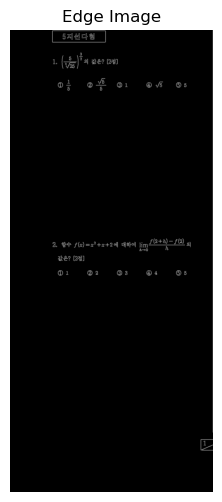

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드 (예시로 grayscale 이미지 사용)
image_path = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\cropped_text_regions\left_math0.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Canny 엣지 검출 적용
edges = cv2.Canny(image, 100, 200)  # 임계값 100, 200 사용

# 엣지 이미지를 시각화
plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Edge Image')
plt.show()


x: 2133, y: 3096, w: 2, h: 2
2 2
x: 1736, y: 3093, w: 18, h: 6
18 6
x: 1579, y: 3093, w: 18, h: 6
18 6
x: 1551, y: 3093, w: 18, h: 6
18 6
x: 1431, y: 3093, w: 18, h: 6
18 6
x: 1959, y: 3092, w: 18, h: 7
18 7
x: 1819, y: 3092, w: 19, h: 7
19 7
x: 1764, y: 3092, w: 18, h: 7
18 7
x: 1699, y: 3092, w: 18, h: 7
18 7
x: 1672, y: 3092, w: 18, h: 7
18 7
x: 2051, y: 3091, w: 18, h: 8
18 8
x: 2022, y: 3091, w: 21, h: 9
21 9
x: 1903, y: 3091, w: 18, h: 8
18 8
x: 1875, y: 3091, w: 18, h: 8
18 8
x: 1644, y: 3091, w: 17, h: 8
17 8
x: 1697, y: 3089, w: 22, h: 1
22 1
x: 1428, y: 3088, w: 23, h: 6
23 6
x: 2049, y: 3087, w: 22, h: 2
22 2
x: 1956, y: 3087, w: 16, h: 6
16 6
x: 1817, y: 3087, w: 23, h: 4
23 4
x: 1790, y: 3086, w: 22, h: 11
22 11
x: 1845, y: 3085, w: 16, h: 12
16 12
x: 1735, y: 3084, w: 13, h: 7
13 7
x: 1578, y: 3084, w: 12, h: 7
12 7
x: 1549, y: 3083, w: 16, h: 8
16 8
x: 1734, y: 3081, w: 14, h: 1
14 1
x: 1577, y: 3081, w: 14, h: 1
14 1
x: 1901, y: 3080, w: 15, h: 9
15 9
x: 2106, y: 3078, 

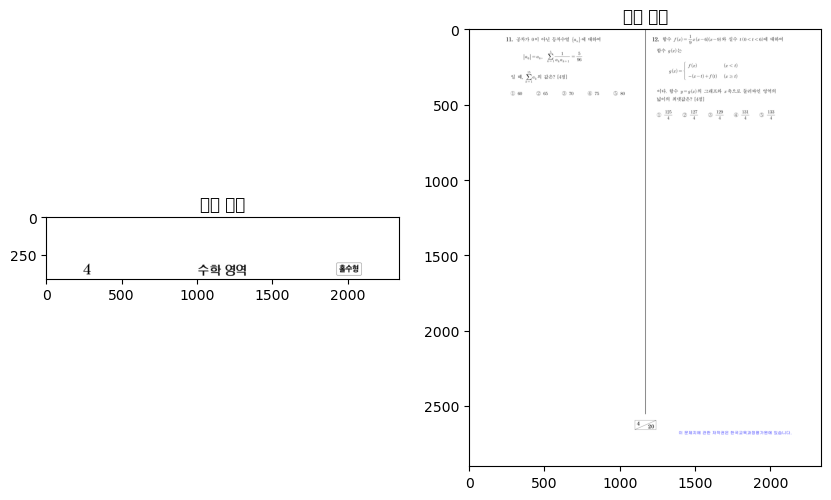

In [255]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 불러오기
image_path = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\croped_G3\2023_G3_11_MATH_statistics\MATH_page3.png'  # 올바른 경로로 설정
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# 이미지가 제대로 로드되지 않았는지 확인
if image is None:
    print(f"이미지를 불러오지 못했습니다: {image_path}")
else:
    # 그레이스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 이진화
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # 윤곽선 찾기
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 가로선 찾기
    horizontal_lines = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        print(f"x: {x}, y: {y}, w: {w}, h: {h}")  # 윤곽선 위치와 크기 출력
        horizontal_lines.append((x, y, w, h))
        print(w, h)

    # 제일 작은 y값을 가진 가로선 찾기
    if horizontal_lines:
        # horizontal_lines.sort(key=lambda line: line[1])  # y 값을 기준으로 정렬
        # smallest_y_line = horizontal_lines[0]  # y 값이 제일 작은 가로선
        # x, y, w, h = smallest_y_line
        largest_h_line = max(horizontal_lines, key=lambda line: line[3])  # h 값이 가장 큰 가로선 찾기
        x, y, w, h = largest_h_line
        
        cut_line = y# 가로선의 중심 위치 계산

        upper_part = image[:cut_line, :]  # 가로선 중심까지 포함
        lower_part = image[cut_line:, :]  # 가로선 중심 아래부터 시작

        # 이미지 저장
        upper_part_path = '/mnt/data/upper_part.png'
        lower_part_path = '/mnt/data/lower_part.png'
        cv2.imwrite(upper_part_path, upper_part)
        cv2.imwrite(lower_part_path, lower_part)

        # 이미지 출력
        plt.figure(figsize=(10, 8))

        plt.subplot(1, 2, 1)
        plt.title('상단 부분')
        plt.imshow(cv2.cvtColor(upper_part, cv2.COLOR_BGR2RGB))

        plt.subplot(1, 2, 2)
        plt.title('하단 부분')
        plt.imshow(cv2.cvtColor(lower_part, cv2.COLOR_BGR2RGB))

        plt.show()

    else:
        print("500픽셀 근처에 가로로 긴 선을 찾을 수 없습니다.")


# 컨투어 영역 확인

Shape: (2725, 1163, 3)
Data type: uint8


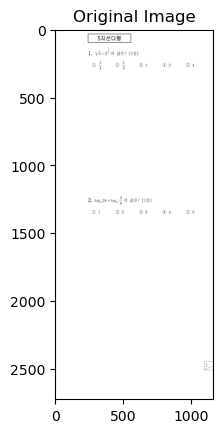

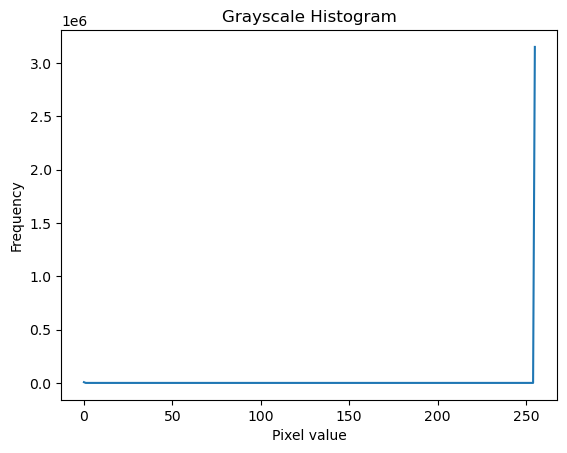

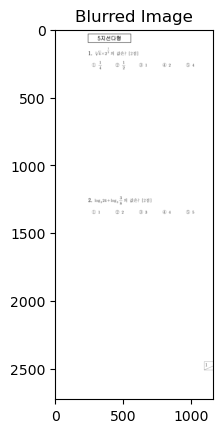

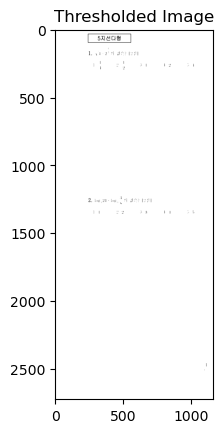

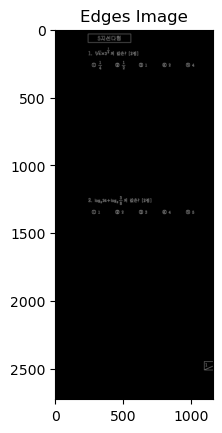

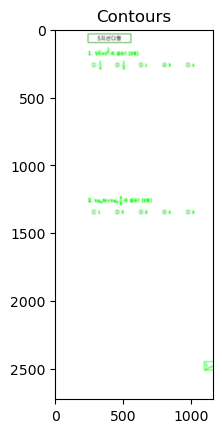

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\math_croped_G2\2024_G2_6_MATH\cropped\2024_G2_6_MATH_left_MATH_page0.png'
def analyze_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Print basic information
    print(f"Shape: {image.shape}")
    print(f"Data type: {image.dtype}")

    # Display the original image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.show()

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate and plot histogram
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title('Grayscale Histogram')
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')
    plt.show()

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    plt.imshow(blurred, cmap='gray')
    plt.title('Blurred Image')
    plt.show()

    # Apply thresholding
    _, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image')
    plt.show()

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)
    plt.imshow(edges, cmap='gray')
    plt.title('Edges Image')
    plt.show()

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    contour_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
    plt.imshow(contour_image, interpolation='bicubic')
    plt.title('Contours')
    plt.show()

# Analyze a specific image
analyze_image(r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\math_croped_G2\2024_G2_6_MATH\cropped\2024_G2_6_MATH_left_MATH_page0.png')


# 가로선 찾는 코드

x: 2133, y: 3096, w: 2, h: 2
2 2
x: 1736, y: 3093, w: 18, h: 6
18 6
x: 1579, y: 3093, w: 18, h: 6
18 6
x: 1551, y: 3093, w: 18, h: 6
18 6
x: 1431, y: 3093, w: 18, h: 6
18 6
x: 1959, y: 3092, w: 18, h: 7
18 7
x: 1819, y: 3092, w: 19, h: 7
19 7
x: 1764, y: 3092, w: 18, h: 7
18 7
x: 1699, y: 3092, w: 18, h: 7
18 7
x: 1672, y: 3092, w: 18, h: 7
18 7
x: 2051, y: 3091, w: 18, h: 8
18 8
x: 2022, y: 3091, w: 21, h: 9
21 9
x: 1903, y: 3091, w: 18, h: 8
18 8
x: 1875, y: 3091, w: 18, h: 8
18 8
x: 1644, y: 3091, w: 17, h: 8
17 8
x: 1697, y: 3089, w: 22, h: 1
22 1
x: 1428, y: 3088, w: 23, h: 6
23 6
x: 2049, y: 3087, w: 22, h: 2
22 2
x: 1956, y: 3087, w: 16, h: 6
16 6
x: 1817, y: 3087, w: 23, h: 4
23 4
x: 1790, y: 3086, w: 22, h: 11
22 11
x: 1845, y: 3085, w: 16, h: 12
16 12
x: 1735, y: 3084, w: 13, h: 7
13 7
x: 1578, y: 3084, w: 12, h: 7
12 7
x: 1549, y: 3083, w: 16, h: 8
16 8
x: 1734, y: 3081, w: 14, h: 1
14 1
x: 1577, y: 3081, w: 14, h: 1
14 1
x: 1901, y: 3080, w: 15, h: 9
15 9
x: 2106, y: 3078, 

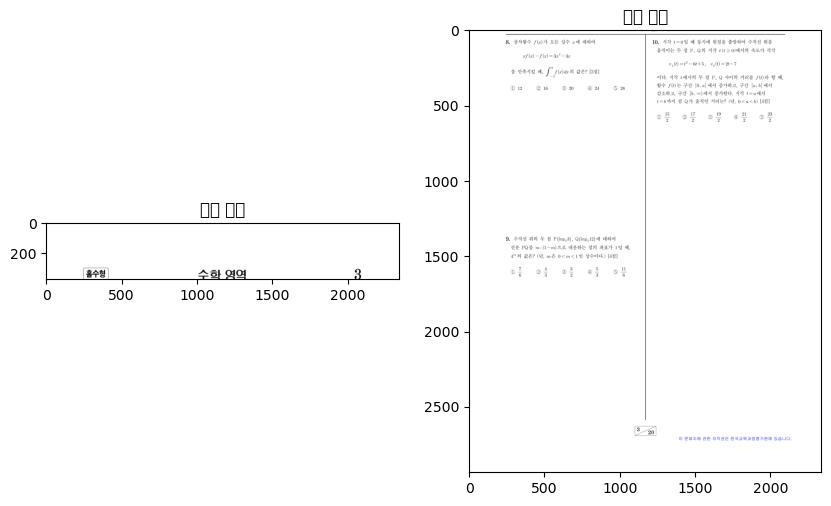

In [245]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 불러오기
image_path = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\croped_G3\2023_G3_11_MATH_statistics\MATH_page2.png'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# 이미지가 제대로 로드되지 않았는지 확인
if image is None:
    print(f"이미지를 불러오지 못했습니다: {image_path}")
else:
    # 그레이스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 이진화
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # 윤곽선 찾기
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 가로선 찾기
    horizontal_lines = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        print(f"x: {x}, y: {y}, w: {w}, h: {h}")  # 윤곽선 위치와 크기 출력
        # if w > 30 and h == 23:  # 너비가 특정 값 이상이고 높이가 작아서 가로선으로 추정되는 경우
        horizontal_lines.append((x, y, w, h))
        print(w,h)

    # # 제일 작은 y값을 가진 가로선 찾기
    # if horizontal_lines:
    #     horizontal_lines.sort(key=lambda line: line[1])  # y 값을 기준으로 정렬
    #     smallest_y_line = horizontal_lines[0]  # y 값이 제일 작은 가로선
    #     x, y, w, h = smallest_y_line


    # y 값 기준으로 정렬
    horizontal_lines.sort(key=lambda line: line[1])

    # 가장 큰 h 값을 가진 가로선의 다음 가로선 찾기
    max_h_index = max(range(len(horizontal_lines)), key=lambda i: horizontal_lines[i][3]) if len(horizontal_lines) > 1 else -1
    if max_h_index != -1 and max_h_index < len(horizontal_lines) - 1:
        second_largest_h_line = horizontal_lines[max_h_index-1]
    else:
        second_largest_h_line = None

    if second_largest_h_line:
        x, y, w, h = second_largest_h_line
        print(f"x: {x}, y: {y}, w: {w}, h: {h}")
        cut_line = y + h // 2  # 가로선의 중심 위치 계산

        upper_part = image[:cut_line, :]  # 가로선 중심까지 포함
        lower_part = image[cut_line:, :]  # 가로선 중심 아래부터 시작

        # 이미지 저장
        upper_part_path = '/mnt/data/upper_part.png'
        lower_part_path = '/mnt/data/lower_part.png'
        cv2.imwrite(upper_part_path, upper_part)
        cv2.imwrite(lower_part_path, lower_part)

        # 이미지 출력
        plt.figure(figsize=(10, 8))

        plt.subplot(1, 2, 1)
        plt.title('상단 부분')
        plt.imshow(cv2.cvtColor(upper_part, cv2.COLOR_BGR2RGB))

        plt.subplot(1, 2, 2)
        plt.title('하단 부분')
        plt.imshow(cv2.cvtColor(lower_part, cv2.COLOR_BGR2RGB))

        plt.show()

    else:
        print("가로로 긴 선을 찾을 수 없습니다.")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


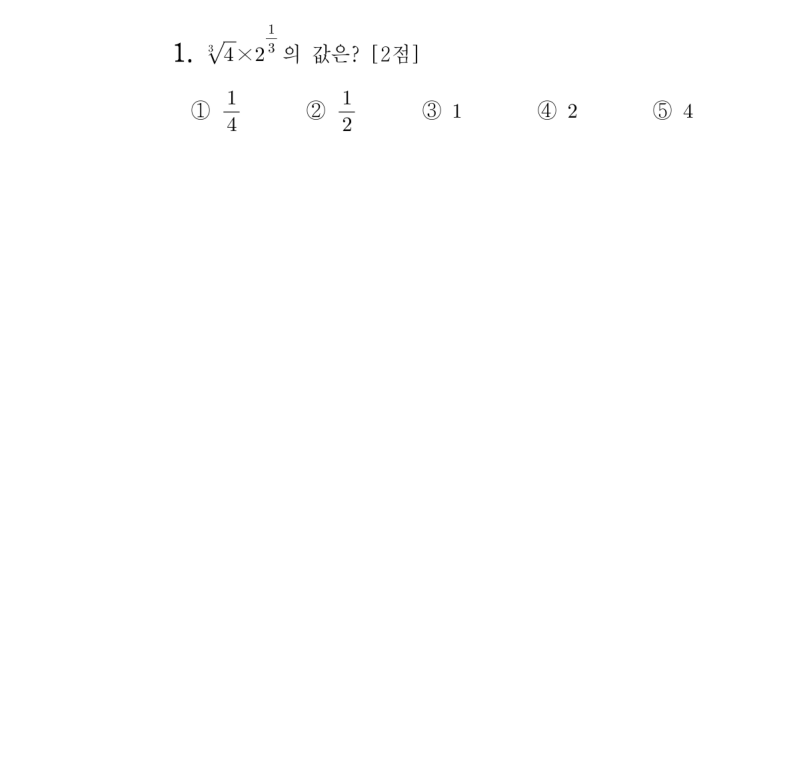

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [9]:
import cv2
import easyocr
import matplotlib.pyplot as plt

def cut_image_below_text(image_path, keywords=["5지선다형",  "단답형"], offset=20):
    # EasyOCR reader 초기화
    reader = easyocr.Reader(['ko'])

    # 이미지 로드
    image = cv2.imread(image_path)

    # 이미지에서 텍스트 인식
    results = reader.readtext(image)

    # 키워드 위치 찾기
    for (bbox, text, prob) in results:
        for keyword in keywords:
            if keyword in text:
                # bbox는 [(x1, y1), (x2, y2), (x3, y3), (x4, y4)] 형태의 4개의 좌표
                x1, y1 = bbox[0]
                x2, y2 = bbox[2]

                # 텍스트 아래 부분 이미지 잘라내기
                cropped_image = image[int(y2)+offset:, :]

                # 잘라낸 이미지 보여주기
                plt.figure(figsize=(10, 10))
                plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
                plt.axis('off')
                plt.show()
                return cropped_image

    print("키워드를 찾을 수 없습니다.")
    return None


# 사용 예제
input_image_path = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\math_croped_G2\2024_G2_6_MATH\cropped\2024_G2_6_MATH_left_MATH_page0.png_cropped_0.png'  # 원본 이미지 경로
cut_image_below_text(input_image_path)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


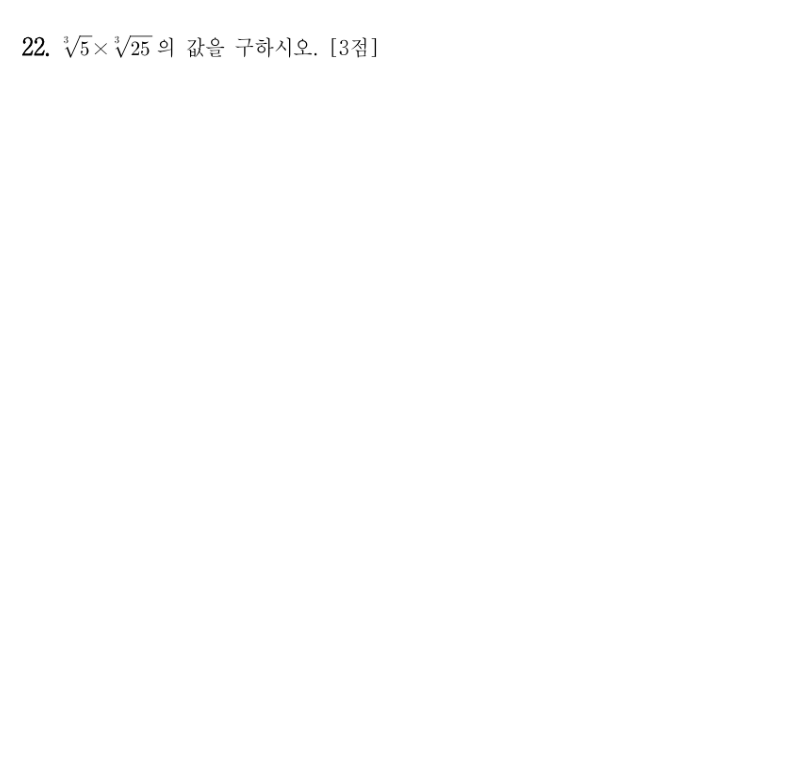

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [23]:
import cv2
import easyocr
import matplotlib.pyplot as plt

def cut_image_below_text(image_path, keywords=["5지선다형", "5 지선다 형", "5지 선다형( ~ 21)", "단답형"], offset=20):
    # EasyOCR reader 초기화
    reader = easyocr.Reader(['ko'])

    # 이미지 로드
    image = cv2.imread(image_path)

    # 이미지에서 텍스트 인식
    results = reader.readtext(image)

    # 키워드 위치 찾기
    for (bbox, text, prob) in results:
        for keyword in keywords:
            if keyword in text:
                # bbox는 [(x1, y1), (x2, y2), (x3, y3), (x4, y4)] 형태의 4개의 좌표
                x1, y1 = bbox[0]
                x2, y2 = bbox[2]

                # 텍스트 아래 부분 이미지 잘라내기
                cropped_image = image[int(y2)+offset:, :]

                # 잘라낸 이미지 보여주기
                plt.figure(figsize=(10, 10))
                plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
                plt.axis('off')
                plt.show()
                return cropped_image

    print("키워드를 찾을 수 없습니다.")
    return None

# 사용 예제
input_image_path = r'C:\Users\BIG3-06\Documents\KDT_Bigdata_7\0614-0726_Final_project\preprocessing\math_croped_G2\2019_G2_6_MATH_A\cropped\2019_G2_6_MATH_A_right_MATH_page8.png_cropped_1.png'  # 원본 이미지 경로
cut_image_below_text(input_image_path)
